In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from PIL import Image
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [5]:
X = np.array(X)
y = np.array(y)

In [7]:
# 画像の例
p = Image.fromarray(np.uint8(X[2].reshape(28,28)))
p.save('./img/sample_img_2.jpg')
p

## 訓練:テスト=8:2の学習

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 学習：3分半くらい
clf = svm.SVC()
model = clf.fit(X_train, y_train)

In [14]:
# Open test
# 予測：7分くらい

closed_preds = []

closed_preds = model.predict(X_train)
closed_preds

array(['5', '4', '8', ..., '1', '0', '0'], dtype=object)

In [41]:
print(X_train.shape, closed_preds.shape)

(56000, 784) (56000,)


In [7]:
# f値とかとaccの表示だけ, confusion_matrixはやりたければ
target_names  = [str(i) for i in range(10)]
closed_results = classification_report(y_train.tolist(), closed_preds.tolist(), target_names=target_names)
closed_accuracy = accuracy_score(y_train.tolist(), closed_preds.tolist())
print(f'closed test accuracy : {closed_accuracy}')

closed test accuracy : 0.9899464285714286


In [14]:
# 結果のテキストファイル保存

with open('./output/closed_test.txt', 'w', encoding='utf-8')as f:
    f.write(closed_results)

In [9]:
# Closed test
# 予測：2分くらい

open_preds = []

open_preds = model.predict(X_test)
open_preds

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [43]:
open_preds.shape

(14000,)

In [10]:
# f値とかとaccの表示だけ, confusion_matrixはやりたければ

open_results = classification_report(y_test.tolist(), open_preds.tolist(), target_names=target_names)
open_accuracy = accuracy_score(y_test.tolist(), open_preds.tolist())
print(f'open test accuracy : {open_accuracy}')

open test accuracy : 0.9764285714285714


In [15]:
# 結果のテキストファイル保存

with open('./output/open_test.txt', 'w', encoding='utf-8')as f:
    f.write(open_results)

## 5分割交差検証

### Close

In [12]:
from sklearn.model_selection import KFold
# 27分半くらい 1周5~6分

model_acc_list = []
i = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X):
    i += 1
    X_k_train = X[train_index]
    y_k_train = y[train_index]
    X_k_test = X[test_index]
    y_k_test = y[test_index]

    k_fold_model = clf.fit(X_k_train, y_k_train)
    preds = k_fold_model.predict(X_k_test)
    acc = accuracy_score(y_k_test.tolist(), preds.tolist())
    model_acc_list.append(acc)
    print(f'model{i} acc : {acc}')

model1 acc : 0.9764285714285714
model2 acc : 0.9794285714285714
model3 acc : 0.9792857142857143
model4 acc : 0.9789285714285715
model5 acc : 0.9787857142857143


In [13]:
# 交差検証の正解率の平均

mean_acc = np.mean(np.array(model_acc_list))
mean_acc

0.9785714285714284

### Open

In [85]:
from sklearn.model_selection import KFold
# 27分半くらい 1周5~6分

model_acc_list = []
i = 0
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X):
    i += 1
    X_k_train = X[train_index]
    y_k_train = y[train_index]
    X_k_test = X[test_index]
    y_k_test = y[test_index]

    k_fold_model = clf.fit(X_k_train, y_k_train)
    preds = k_fold_model.predict(X_k_train)
    acc = accuracy_score(y_k_test.tolist(), preds.tolist())
    model_acc_list.append(acc)
    print(f'model{i} acc : {acc}')

In [ ]:
# 交差検証の正解率の平均

mean_acc = np.mean(np.array(model_acc_list))
mean_acc

## Confusion Matrix
* ref: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [33]:
closed_preds.shape

(56000,)

In [42]:
y_test.shape

(14000,)

### Closed

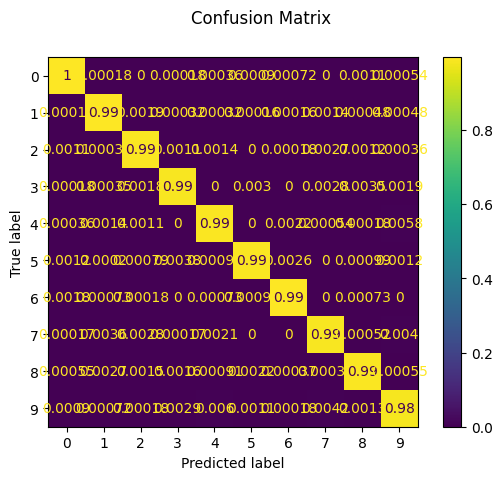

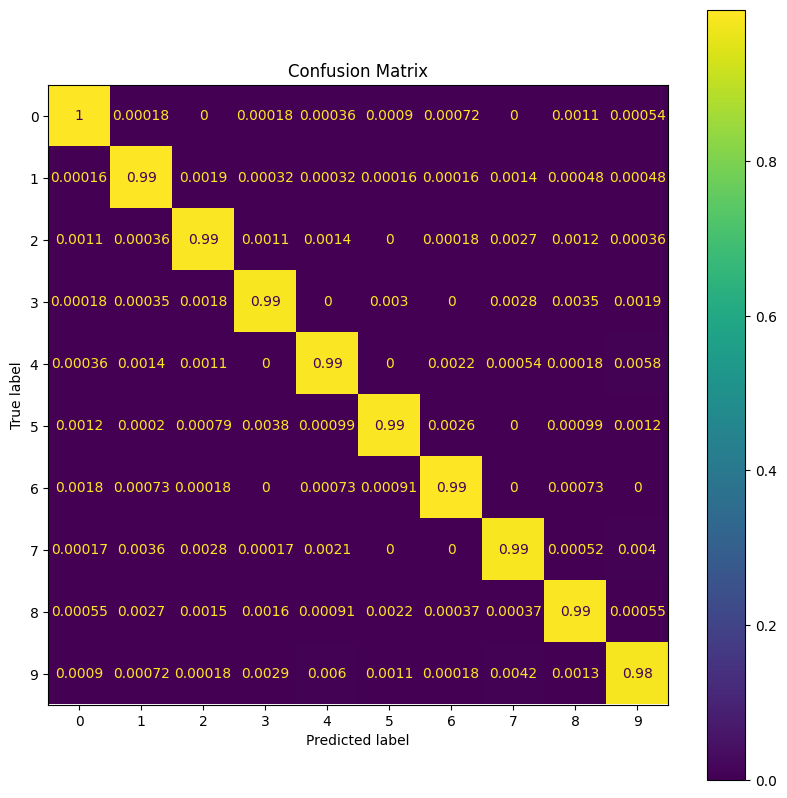

In [15]:
from sklearn import datasets, metrics, svm

disp = metrics.ConfusionMatrixDisplay.from_predictions(normalize="true", y_true=y_train, y_pred=closed_preds)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion Matrix")
disp.plot(ax=ax)

### Open

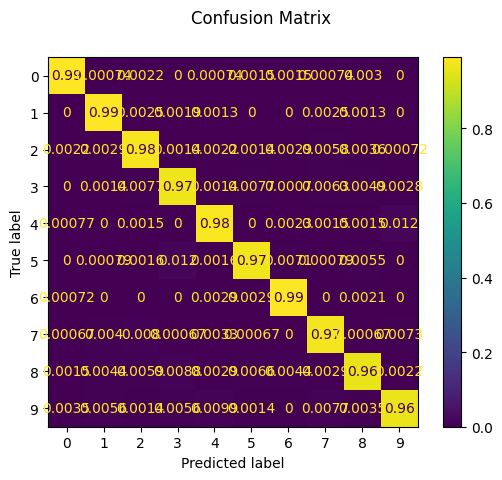

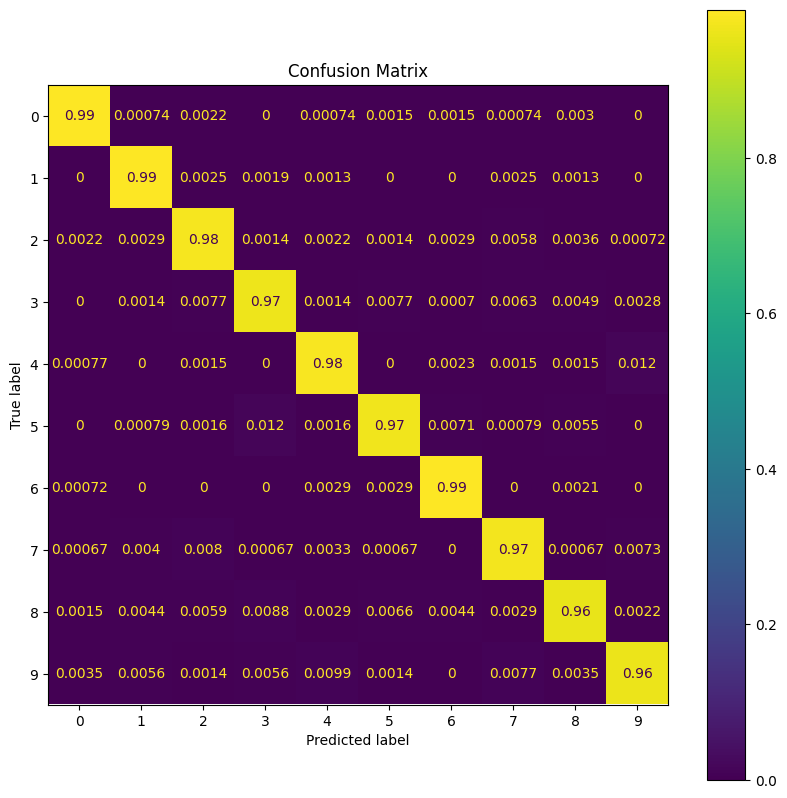

In [83]:
from sklearn import datasets, metrics, svm

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, open_preds, normalize="true")
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion Matrix")
disp.plot(ax=ax)
# plt.show()

In [26]:
closed_preds

array(['5', '4', '8', ..., '1', '0', '0'], dtype=object)